## 【問題1】1次関数

x が-50から50の範囲で次の式を考えます。

$$
y = \frac{1}{2}x+1
$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [3]:
import numpy as np

# -50から50まで0.1間隔のxを表すndarray
x = np.arange(-50, 50.1, 0.1)
y = ((1/2) * x) + 1

print(x)
print(y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


## 【問題2】配列の結合

問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [5]:
data_x = x.reshape(1001, 1)
# data1 = x.reshape(-1, 1)
data_y = y.reshape(1001, 1)
# data2 = y,reshape(-1, 1)

concat_data = np.concatenate((data_x, data_y), axis=1)
# np.hstackの場合は以下の通り。解はconcatと同じ。
# concat_data = np.hstack([data1, data2])

print(concat_data.shape)

(1001, 2)


## 【問題3】勾配を求める

各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

$$
勾配=\frac{yの変化量}{xの変化量}
$$

In [6]:
# x_gradient = np.gradient(x)
# dx = xy[1: ,0]
# y_gradient = np.gradient(y)

d_x_a = data_x[1:]
d_x_b = data_x[:-1]
d_y_a = data_y[1:]
d_y_b = data_y[:-1]

x_difference = d_x_b - d_x_a
y_difference = d_y_b - d_y_a

total_gradient = (y_difference / x_difference)
total_gradient

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

## 【問題4】グラフを描く

1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

[matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html)

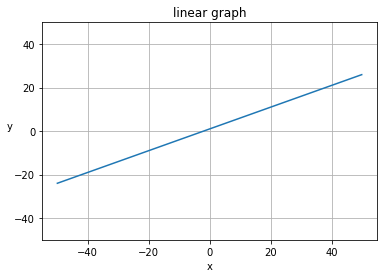

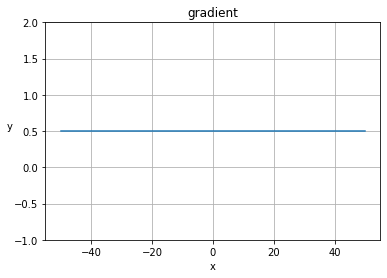

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 一次関数のグラフ
x = np.arange(-50, 50, 0.1)
y = ((1/2) * x) + 1

plt.ylim([-50, 50])
plt.title('linear graph')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.grid()

plt.plot(x, y)
plt.show()

# 横軸をx、縦軸を勾配としたグラフ
y = total_gradient.reshape(1000,)

# print(y)

plt.ylim([-1, 2])
plt.title('gradient')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.grid()

plt.plot(x, y)
plt.show()

## 【問題5】Pythonの関数化

問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
y = x^2 (−50≤x≤50) \\
y = 2x^2 + 2^x (−50≤x≤50) \\
y = sin(x^\frac{1}{2}) (0≤x≤50)
$$
また、問題4と同様にグラフを描いてください。


ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。


[numpy.sin — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html#numpy.sin)

【確認】

この課題での正弦(sin)の値とは、直角三角形のxとyで言うと、

$$
\sin\theta = \frac{y}{\sqrt{x^2+y^2}} \\
$$
つまり、
$$
\sin\theta (または勾配) = \frac{yの変化量}{(xの変化量)^2+(yの変化量)^2} \\
$$


In [8]:
def function1(array_x):
    array_y = ((1/2) * array_x) + 1
    return array_y

def function2(array_x):
    array_y = array_x ** 2
    return array_y

def function3(array_x):
    array_y = 2 * (array_x ** 2) + (2 ** array_x)
    return array_y

def function4(array_x):
    array_y = np.sin(array_x ** 0.5)
    return array_y

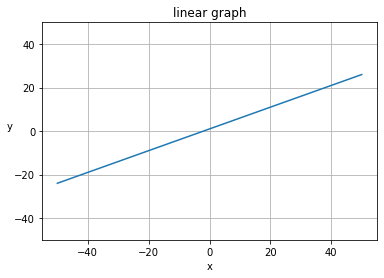

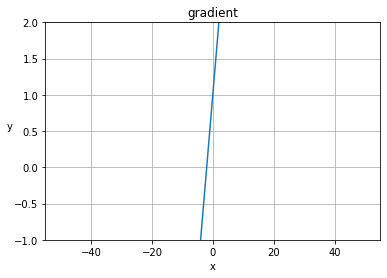

In [33]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
    """
    int1, int2, int3 = x_range
    array_x = np.arange(int1, int2, int3)
    array_y = function(array_x)
    
    n = array_x.shape
    
    int4 = n[0]
    
    data_x = array_x.reshape(int4, 1)
    data_y = array_y.reshape(int4, 1)
    array_xy = np.concatenate((data_x, data_y), axis=1)

    data_x_a = data_x[1:]
    data_x_b = data_x[:-1]
    data_y_a = data_y[1:]
    data_y_b = data_y[:-1]

    x_difference = data_x_b - data_x_a
    y_difference = data_y_b - data_y_a
    
    gradient = (y_difference / x_difference)

    %matplotlib inline
    # 一次関数のグラフ
    x = array_x
    y = array_y

    plt.ylim([-50, 50])
    plt.title('linear graph')
    plt.xlabel('x')
    plt.ylabel('y', rotation=0)
    plt.grid()

    plt.plot(x, y)
    plt.show()

    # 横軸をx、縦軸を勾配としたグラフ
    x = array_x
    # y = gradient
    # print(x, y)

    plt.ylim([-1, 2])
    plt.title('gradient')
    plt.xlabel('x')
    plt.ylabel('y', rotation=0)
    plt.grid()

    plt.plot(x, y)
    plt.show()

    return array_xy, array_xy.shape, gradient, gradient.shape



array_xy, array_xy.shape, gradient, gradient.shape = compute_gradient(function1)

$$
y = x^2 \\
(−50≤x≤50)
$$

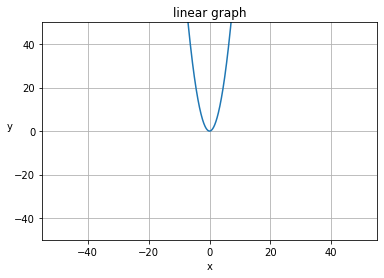

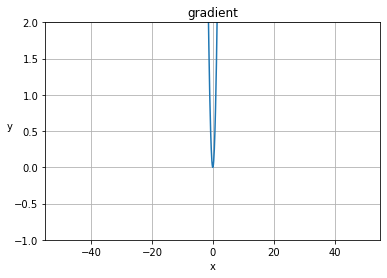

(array([[ -50.  , 2500.  ],
        [ -49.9 , 2490.01],
        [ -49.8 , 2480.04],
        ...,
        [  49.8 , 2480.04],
        [  49.9 , 2490.01],
        [  50.  , 2500.  ]]),
 (1001, 2),
 array([[-99.9],
        [-99.7],
        [-99.5],
        [-99.3],
        [-99.1],
        [-98.9],
        [-98.7],
        [-98.5],
        [-98.3],
        [-98.1],
        [-97.9],
        [-97.7],
        [-97.5],
        [-97.3],
        [-97.1],
        [-96.9],
        [-96.7],
        [-96.5],
        [-96.3],
        [-96.1],
        [-95.9],
        [-95.7],
        [-95.5],
        [-95.3],
        [-95.1],
        [-94.9],
        [-94.7],
        [-94.5],
        [-94.3],
        [-94.1],
        [-93.9],
        [-93.7],
        [-93.5],
        [-93.3],
        [-93.1],
        [-92.9],
        [-92.7],
        [-92.5],
        [-92.3],
        [-92.1],
        [-91.9],
        [-91.7],
        [-91.5],
        [-91.3],
        [-91.1],
        [-90.9],
        [-90.7],
      

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

compute_gradient(function2)

$$
y = 2x^2+2x \\
(-50\leq x\leq50)
$$

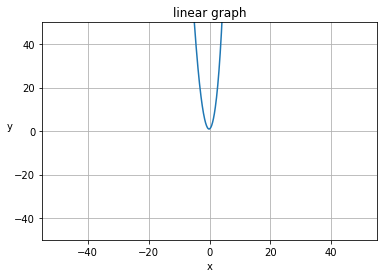

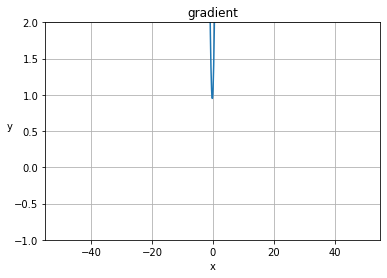

(array([[-5.00000000e+01,  5.00000000e+03],
        [-4.99000000e+01,  4.98002000e+03],
        [-4.98000000e+01,  4.96008000e+03],
        ...,
        [ 4.98000000e+01,  9.80152798e+14],
        [ 4.99000000e+01,  1.05050176e+15],
        [ 5.00000000e+01,  1.12589991e+15]]),
 (1001, 2),
 array([[-1.99800000e+02],
        [-1.99400000e+02],
        [-1.99000000e+02],
        [-1.98600000e+02],
        [-1.98200000e+02],
        [-1.97800000e+02],
        [-1.97400000e+02],
        [-1.97000000e+02],
        [-1.96600000e+02],
        [-1.96200000e+02],
        [-1.95800000e+02],
        [-1.95400000e+02],
        [-1.95000000e+02],
        [-1.94600000e+02],
        [-1.94200000e+02],
        [-1.93800000e+02],
        [-1.93400000e+02],
        [-1.93000000e+02],
        [-1.92600000e+02],
        [-1.92200000e+02],
        [-1.91800000e+02],
        [-1.91400000e+02],
        [-1.91000000e+02],
        [-1.90600000e+02],
        [-1.90200000e+02],
        [-1.89800000e+02],
       

In [18]:
compute_gradient(function3)

$$
y = sin(x^\frac{1}{2}) \\
(0 \leq x \leq 50)
$$

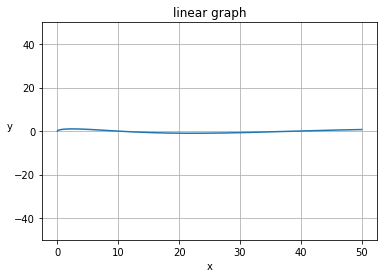

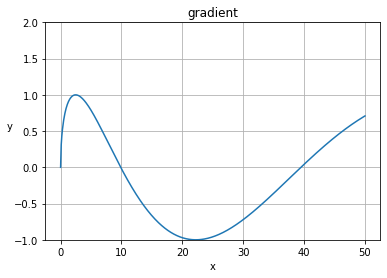

(array([[ 0.        ,  0.        ],
        [ 0.1       ,  0.31098359],
        [ 0.2       ,  0.43245484],
        ...,
        [49.8       ,  0.69880548],
        [49.9       ,  0.70385354],
        [50.        ,  0.70886129]]),
 (501, 2),
 array([[ 3.10983593e+00],
        [ 1.21471246e+00],
        [ 8.82894606e-01],
        [ 7.03828177e-01],
        [ 5.85098219e-01],
        [ 4.97909314e-01],
        [ 4.29817921e-01],
        [ 3.74409878e-01],
        [ 3.27982463e-01],
        [ 2.88220882e-01],
        [ 2.53589429e-01],
        [ 2.23021164e-01],
        [ 1.95746946e-01],
        [ 1.71195280e-01],
        [ 1.48930670e-01],
        [ 1.28614067e-01],
        [ 1.09976607e-01],
        [ 9.28016447e-02],
        [ 7.69121494e-02],
        [ 6.21616541e-02],
        [ 4.84276337e-02],
        [ 3.56065709e-02],
        [ 2.36102232e-02],
        [ 1.23627575e-02],
        [ 1.79852267e-03],
        [-8.13970144e-03],
        [-1.75020966e-02],
        [-2.63329234e-02],
  

In [34]:
compute_gradient(function4, (0, 50.1, 0.1))

## 【問題6】最小値を求める

問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。


[numpy.ndarray.min — NumPy v1.16 Manual](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html)

[numpy.ndarray.argmin — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.argmin.html)

In [97]:
def compute_min_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    y 

    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    min_gradient : yの最小値を返す。
    min_gradient_range : 最小のyの前後の勾配値を返す。
    """
    int1, int2, int3 = x_range
    array_x = np.arange(int1, int2, int3)
    array_y = function(array_x)
    
    n = array_x.shape
    
    int4 = n[0]
    
    data_x = array_x.reshape(int4, 1)
    data_y = array_y.reshape(int4, 1)
    array_xy = np.concatenate((data_x, data_y), axis=1)

    data_x_a = data_x[1:]
    data_x_b = data_x[:-1]
    data_y_a = data_y[1:]
    data_y_b = data_y[:-1]

    x_difference = data_x_b - data_x_a
    y_difference = data_y_b - data_y_a
    
    gradient = (y_difference / x_difference)

    min_gradient = data_y.min(axis=0)
    min_gradient_index = data_y.argmin()
    min_gradient_index_pre = min_gradient_index - 1
    min_gradient_index_post = min_gradient_index + 1

    return "yの最小値は{}".format(min_gradient), "前後の勾配は{}".format(gradient[min_gradient_index_pre, 0]), "と{}である。".format(gradient[min_gradient_index_post, 0])


$$
y = \frac{1}{2}x+1 \\
(−50≤x≤50)
$$

In [98]:
compute_min_gradient(function1)

('yの最小値は[-24.]', '前後の勾配は0.5', 'と0.5である。')

$$
y = x^2 \\
(−50≤x≤50)
$$

In [100]:
compute_min_gradient(function2)

('yの最小値は[5.04870979e-25]',
 '前後の勾配は-0.09999999999858034',
 'と0.30000000000142535である。')

$$
y = 2x^2+2x \\
(-50\leq x\leq50)
$$

In [102]:
compute_min_gradient(function3)

('yの最小値は[0.95055056]', '前後の勾配は-0.4170183305979998', 'と0.4696700846350943である。')

$$
y = sin(x^\frac{1}{2}) \\
(0 \leq x \leq 50)
$$

In [103]:
compute_min_gradient(function4, (0, 50.1, 0.1))

('yの最小値は[-0.99999975]',
 '前後の勾配は-0.0006388422559544435',
 'と0.0016061158921243152である。')